# General info

В качестве проверки отыскания корней для всех случаев - подставлять их обратно в f(x)=0 и смотреть, что с заданной точностью все ок.

Некоторые уточнения в части реализации метода Ньютона

1. производную можно взять по численной формуле второго порядка, например. Для этого надо выбрать самостоятельно параметр h , для расчета вблизи нужной точки: (f(x+h)-f(x-h))/2h
2. то же самое можно делать для системы уравнений , чтобы составить матрицу Якоби, так как там частные производные по конкретной неизвестной
3. Напоминаю, что можно не обращать матрицу Якоби в методе Ньютона для решения системы, а можно перейти к СЛАУ на поправки: J(x)*delta_x = -F ; x_next = x + delta_x . Для решения СЛАУ - взять ранее реализованный метод из второй лабы.



# Part I

Equation: ln(x) + (x-1)^3 = 0

1. Сконструировать МПИ для разных корней. 
2. Отыскать корни методом Ньютона (задавая разные начальные приближения).

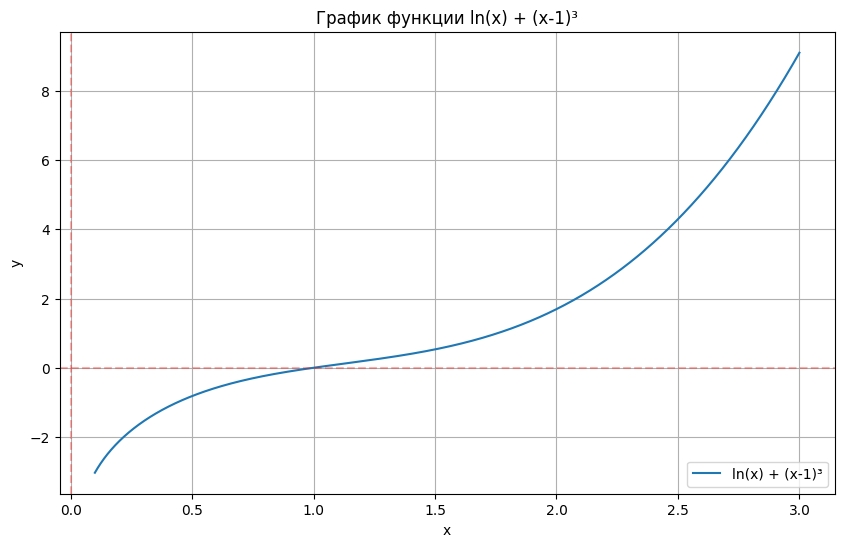

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def F(x):
    return np.log(x) + (x-1)**3

def plot_function():
    x = np.linspace(0.1, 3, 1000)  
    y = F(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='ln(x) + (x-1)³')
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
    plt.grid(True)
    plt.legend()
    plt.title('График функции ln(x) + (x-1)³')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

plot_function()

## Метод простых итераций

Будем искать корень на интервале (0.8, 1.2)

Выразим x из уравнения: x = exp((1-x)³) = f(x)

f' = -3(1-x)² * exp((1-x)³)

|f'| = 3(1-x)² * exp((1-x)³) <= 3 * 0.04 * exp(0.008) < 1

метод сходится.




In [34]:
def f(x):
    return np.exp((1-x)**3)


def simple_iteration_method(f, x0, tol=1e-6, max_iter=1000):
    x = x0
    errors = []
    
    for i in range(max_iter):
        x_new = f(x)
        error = abs(x_new - x)
        errors.append(error)
        
        if error < tol:
            return x_new, i+1, errors
        
        x = x_new
    
    raise ValueError("Method did not converge")


Корень: 1.000000 (итераций: 3)


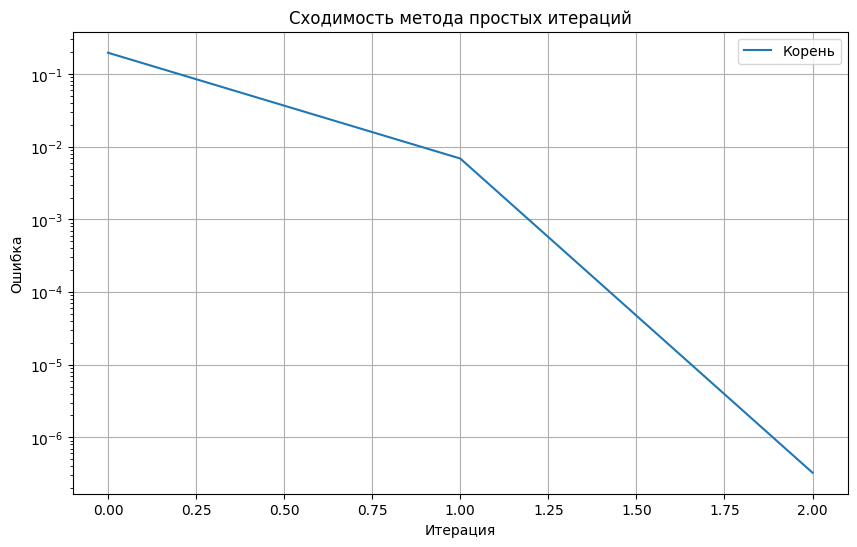

In [36]:
x0 = 0.81
root, iters, errors = simple_iteration_method(f, x0)


print(f"Корень: {root:.6f} (итераций: {iters})")

plt.figure(figsize=(10, 6))
plt.semilogy(errors, label='Корень')
plt.grid(True)
plt.legend()
plt.title('Сходимость метода простых итераций')
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.show()

# Метод Ньютона


Начальное приближение x0 = 0.8
Корень: 1.00000000
Количество итераций: 4
Проверка: F(root) = -1.17e-14


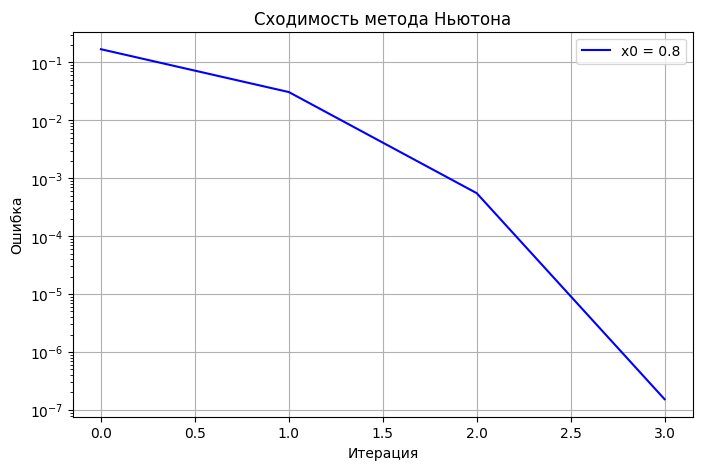


Начальное приближение x0 = 1.2
Корень: 1.00000000
Количество итераций: 3
Проверка: F(root) = -2.11e-15


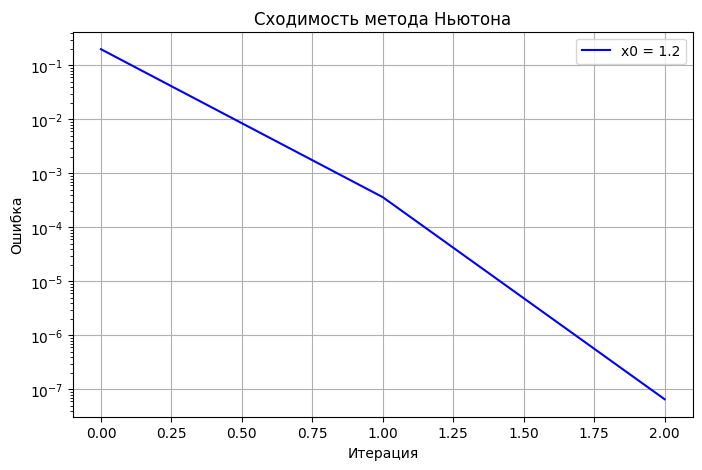


Начальное приближение x0 = 2.0
Корень: 1.00000000
Количество итераций: 6
Проверка: F(root) = 0.00e+00


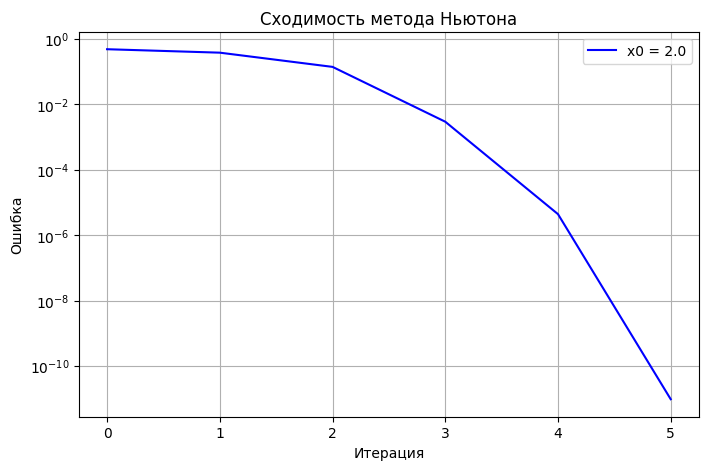

In [18]:
def F(x):
    return np.log(x) + (x-1)**3

def dF(x, h=1e-6):
    return (F(x + h) - F(x - h)) / (2 * h)

def newton_method(x0, tol=1e-6, max_iter=1000):
    x = x0
    errors = []
    
    for i in range(max_iter):
        dx = F(x) / dF(x)
        x_new = x - dx
        error = abs(x_new - x)
        errors.append(error)
        
        if error < tol:
            return x_new, i+1, errors
            
        x = x_new
    
    raise ValueError("Method did not converge")

x0_values = [0.8, 1.2, 2.0]

for x0 in x0_values:
    try:
        root, iters, errors = newton_method(x0)
        print(f"\nНачальное приближение x0 = {x0}")
        print(f"Корень: {root:.8f}")
        print(f"Количество итераций: {iters}")
        print(f"Проверка: F(root) = {F(root):.2e}")
        
        # График сходимости
        plt.figure(figsize=(8, 5))
        plt.semilogy(errors, 'b-', label=f'x0 = {x0}')
        plt.grid(True)
        plt.legend()
        plt.title('Сходимость метода Ньютона')
        plt.xlabel('Итерация')
        plt.ylabel('Ошибка')
        plt.show()
        
    except ValueError as e:
        print(f"\nДля x0 = {x0}: {e}")

# Part II

System of equations:

cos(x-1) + y = 0.5

x - cos(y) = 3

1. Сконструировать МПИ для отыскания корней
2. Методом Ньютона для СНУ.

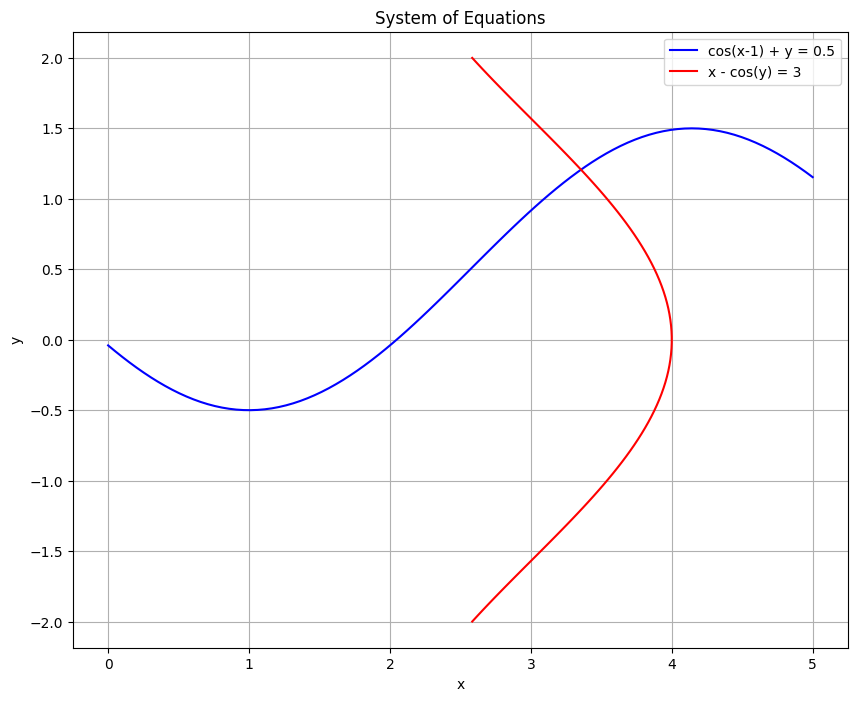

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(10, 8))

plt.plot(x, 0.5 - np.cos(x-1), 'b-', label='cos(x-1) + y = 0.5')

y_line = np.linspace(-2, 2, 100)
x_line = 3 + np.cos(y_line)
plt.plot(x_line, y_line, 'r-', label='x - cos(y) = 3')

plt.grid(True)
plt.legend()
plt.title('System of Equations')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

plt.legend()
plt.show()




# МПИ

x = 3 + cos(y)

y = 0.5 - cos(x-1)

J = (0, -sin(y); sin(x-1), 0)

Норма J на рассматриваемом интервале меньше 1, метод сходится.

root: [3.35591124 1.20690639] (iterations: 65)


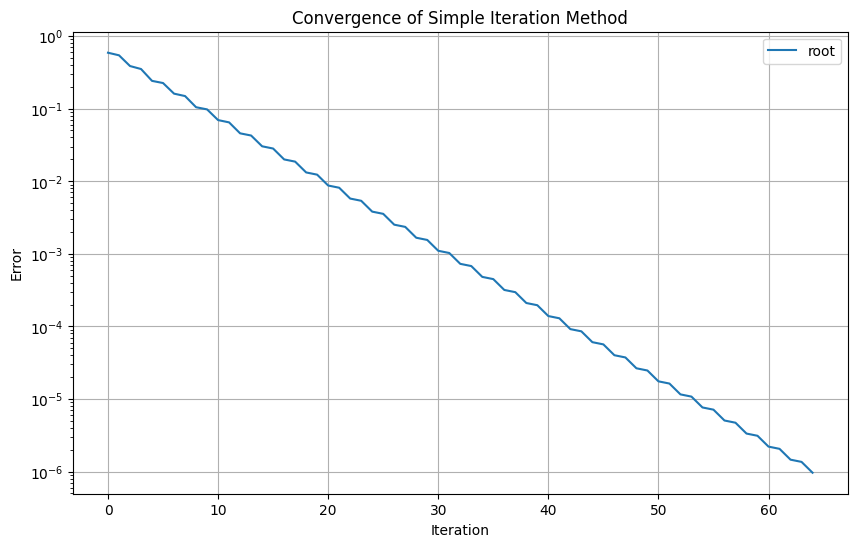


Проверка корней:
cos(x-1) + y - 0.5 = -7.64e-08
x - cos(y) - 3 = -8.97e-07

Корни найдены с заданной точностью!


In [28]:
def simple_iteration_method(f, x0, tol=1e-6, max_iter=1000):
    x = x0[0]
    y = x0[1]
    errors = []
    
    for i in range(max_iter):
        x_new = 3 + np.cos(y)
        y_new = 0.5 - np.cos(x-1)
        error = np.sqrt((x_new - x)**2 + (y_new - y)**2)
        errors.append(error)
        
        if error < tol:
            return np.array([x_new, y_new]), i+1, errors
        
        x, y = x_new, y_new
    
    raise ValueError("Method did not converge")

x0 = np.array([3.0, 1.5])
root, iters, errors = simple_iteration_method(f, x0)

print(f"root: {root} (iterations: {iters})")

plt.figure(figsize=(10, 6))
plt.semilogy(errors, label='root')
plt.grid(True)
plt.legend()
plt.title('Convergence of Simple Iteration Method')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

# Подставляем найденные корни в исходную систему
x_sol, y_sol = root
eq1 = np.cos(x_sol-1) + y_sol - 0.5  
eq2 = x_sol - np.cos(y_sol) - 3      

print("\nПроверка корней:")
print(f"cos(x-1) + y - 0.5 = {eq1:.2e}")
print(f"x - cos(y) - 3 = {eq2:.2e}")

if abs(eq1) < 1e-6 and abs(eq2) < 1e-6:
    print("\nКорни найдены с заданной точностью!")
else:
    print("\nТочность решения недостаточна.")

# Метод Ньютона




Начальное приближение: [3.  1.5]
Корень: [3.35591174 1.20690682]
Количество итераций: 4
Проверка: ||F(root)|| = 2.22e-16


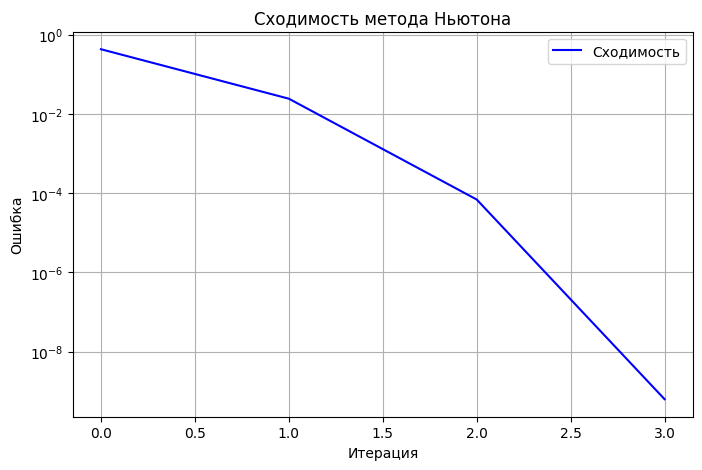

In [32]:
def F(x):
    return np.array([
        np.cos(x[0]-1) + x[1] - 0.5,
        x[0] - np.cos(x[1]) - 3
    ])

def J(x, h=1e-5):
    n = len(x)
    jacob = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            x_plus = x.copy()
            x_minus = x.copy()
            x_plus[j] += h
            x_minus[j] -= h
            jacob[i,j] = (F(x_plus)[i] - F(x_minus)[i]) / (2*h)
    
    return jacob

def newton_method(x0, tol=1e-6, max_iter=100):
    x = x0
    errors = []
    
    for i in range(max_iter):
        j = J(x)
        f = F(x)
        
        # Решаем СЛАУ J*delta_x = -F
        # Метод бисопряженных градиентов
        b = -f
        x_bcg = np.zeros_like(b)
        r = b - j @ x_bcg
        r_tilde = r.copy()
        p = r.copy()
        p_tilde = r_tilde.copy()
        
        max_bcg_iter = 1000
        bcg_tol = 1e-10
        
        for k in range(max_bcg_iter):
            alpha = np.dot(r, r_tilde) / np.dot(j @ p, p_tilde)
            x_bcg = x_bcg + alpha * p
            r_new = r - alpha * (j @ p)
            r_tilde_new = r_tilde - alpha * (j.T @ p_tilde)
            
            beta = np.dot(r_new, r_tilde_new) / np.dot(r, r_tilde)
            p = r_new + beta * p
            p_tilde = r_tilde_new + beta * p_tilde
            
            if np.linalg.norm(r_new) < bcg_tol:
                break
                
            r = r_new
            r_tilde = r_tilde_new
            
        delta_x = x_bcg
        
        x_new = x + delta_x
        error = np.linalg.norm(delta_x)
        errors.append(error)
        
        if error < tol:
            return x_new, i+1, errors
            
        x = x_new
    
    raise ValueError("Method did not converge")

x0 = np.array([3.0, 1.5])

try:
    root, iters, errors = newton_method(x0)
    print(f"\nНачальное приближение: {x0}")
    print(f"Корень: {root}")
    print(f"Количество итераций: {iters}")
    print(f"Проверка: ||F(root)|| = {np.linalg.norm(F(root)):.2e}")
    
    # График сходимости
    plt.figure(figsize=(8, 5))
    plt.semilogy(errors, 'b-', label='Сходимость')
    plt.grid(True)
    plt.legend()
    plt.title('Сходимость метода Ньютона')
    plt.xlabel('Итерация')
    plt.ylabel('Ошибка')
    plt.show()
    
except ValueError as e:
    print(f"Ошибка: {e}")